**Movie Rating Prediction AI Project**

**21k-3419 Muhammad Huzaifa**,
**21k-3455 Alishba Jaffery**,
**21k-4519 Fatima Ashraf**

**Load the Dataset**

In [12]:
from warnings import filterwarnings
filterwarnings('ignore')

In [13]:
import pandas as pd
df = pd.read_csv('movies_dataset.csv',na_values=(' '),encoding='latin-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,NaN,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [14]:
df.shape

(15509, 10)

In [15]:
print('Number of Rows',df.shape[0])
print('Number of Columns',df.shape[1])

Number of Rows 15509
Number of Columns 10


In [16]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,7919.0,5.841621,1.381777,1.1,4.9,6.0,6.8,10.0


**Perform Basic Operations To Check Null $ Duplicate Values**

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15508 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [19]:
df.isnull().sum()

Name           1
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [20]:
df.duplicated().sum()

6

So, After performing operations, we got to know that there are missing and duplicate values in dataset.

**Feature Engineering**

**1. Handling missing values:**

Rating, Votes has many missing values, almost half of the rows of dataset are missing. Rating is our target feature, lets handle missing values. As per IMDB structure, final rating is determined by aggregated value of votes. Lets handle missing Votes.

**Drop Duplicate Rows**

In [21]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [22]:
df.nunique()

Name        13837
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64

**Filling Null Values**

In [23]:
cat = list(df.columns[df.dtypes=='object'])

In [24]:
mn = df['Rating'].mean()
df['Rating'].fillna(mn,inplace=True)

In [25]:
for i in cat:
    m = df[i].mode()[0]
    df[i].fillna(m,inplace=True)

In [26]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [27]:
df.shape

(15503, 10)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15503 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15503 non-null  object 
 1   Year      15503 non-null  object 
 2   Duration  15503 non-null  object 
 3   Genre     15503 non-null  object 
 4   Rating    15503 non-null  float64
 5   Votes     15503 non-null  object 
 6   Director  15503 non-null  object 
 7   Actor 1   15503 non-null  object 
 8   Actor 2   15503 non-null  object 
 9   Actor 3   15503 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.3+ MB


In [29]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,Anjaam,(2019),120 min,Drama,5.841621,8,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.000000,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",5.841621,8,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.400000,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,5.841621,8,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


**2. Convert Year, Votes from string to int**

In [30]:
# Convert Date column from string to int
df['Year']= df['Year'].str.strip('()').astype(int)
# Convert Votes column from string to int
df['Votes'] = df['Votes'].str.replace(',','')
df['Votes'] = df['Votes'].str.replace('.','')
df['Votes'] = df['Votes'].str.strip('$')
df['Votes'] = df['Votes'].str.strip('M')
df['Votes'] = df['Votes'].astype(int)

In [31]:
df.nunique()

Name        13837
Year          102
Duration      182
Genre         485
Rating         85
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64

In [32]:
df.dtypes

Name         object
Year          int32
Duration     object
Genre        object
Rating      float64
Votes         int32
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

**3. Some Analysis Based On Our Dataset**

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Number Of Movies By Year**

In [34]:
df.Year.value_counts().sort_index()

Year
1913      1
1914      1
1915      1
1917      1
1922      1
       ... 
2018    381
2019    935
2020    320
2021    392
2022     38
Name: count, Length: 102, dtype: int64

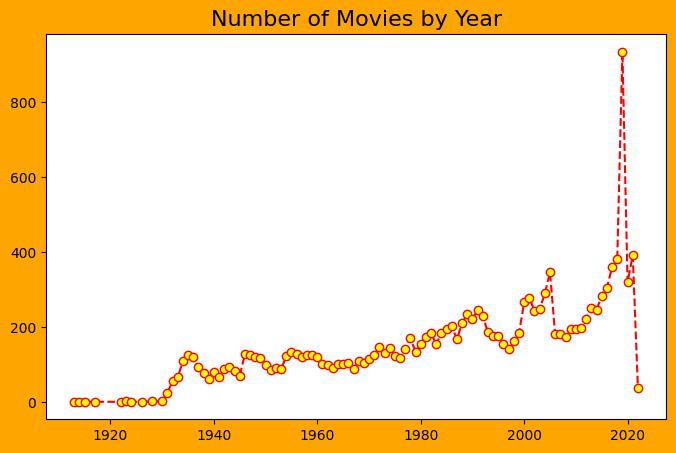

In [35]:
years = df['Year'].value_counts().sort_index()

plt.figure(facecolor = "orange",figsize = (8,5))
plt.plot(years.index, 
         years.values,
         marker = "o", 
         color = "red", 
         linestyle = "--",
         markerfacecolor = "yellow")
plt.title("Number of Movies by Year", fontsize = 16)
plt.show()

**Top 10 Most Filmed Genres**

In [36]:
df.Genre.value_counts()

Genre
Drama                         4655
Action                        1288
Thriller                       777
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: count, Length: 485, dtype: int64

In [37]:
# separates movie genres by comma
genres = df['Genre'].str.split(',')
 
# explode method puts each type on a separate line
genres = genres.explode()

# top 10 most recurring movie genres
genres.value_counts().head(10)

Genre
Drama        6392
Action       3486
 Drama       2726
 Romance     1687
Comedy       1561
 Thriller     927
 Crime        863
Thriller      784
 Family       782
Romance       762
Name: count, dtype: int64

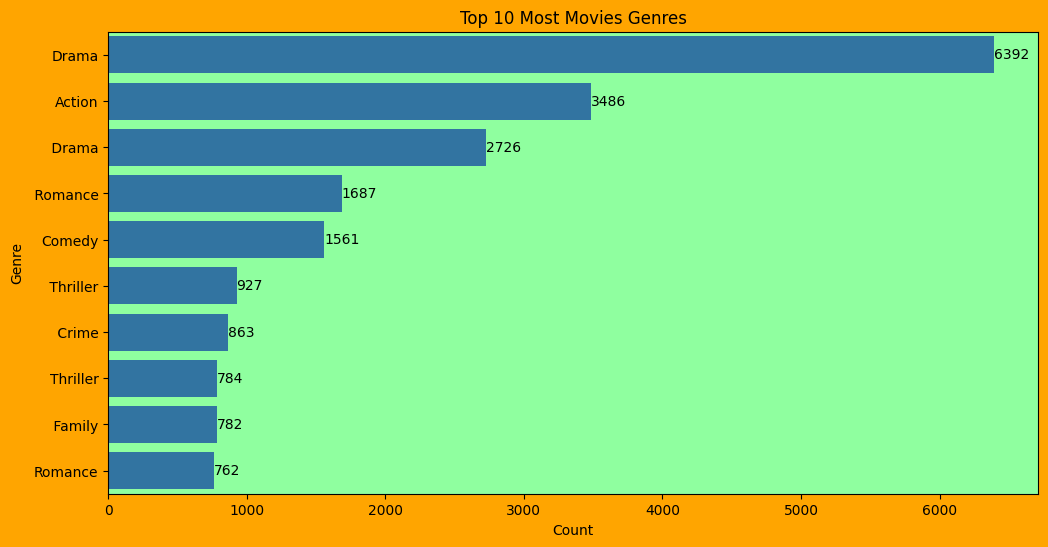

In [38]:
plt.figure(facecolor = "orange",figsize = (12, 6))
ax= sns.barplot(y = genres.value_counts().head(10).index, x = genres.value_counts().head(10).values)

ax.set(xlabel='Count',ylabel='Genre', title='Top 10 Most Movies Genres')
ax.set_facecolor("xkcd:mint green")
ax.bar_label(ax.containers[0])

plt.show()

**Top 10 Movies Based on Ratings**

In [39]:
top1_10=df[["Name","Genre","Rating"]].sort_values(by="Rating",ascending=False).head(10)
print("TOP_10 based on ratings")
top1_10

TOP_10 based on ratings


,Name,Genre,Rating
8339,Love Qubool Hai,"Drama, Romance",10.0
5410,Half Songs,"Music, Romance",9.7
2563,Breed,Drama,9.6
14222,The Reluctant Crime,Drama,9.4
5077,Gho Gho Rani,"History, Romance",9.4
6852,June,Drama,9.4
11704,Ram-Path,Documentary,9.4
9105,Meher,Drama,9.3
1314,Ashok Vatika,Drama,9.3
8564,Mahakaleshwar - Legends of Shiva,Documentary,9.3


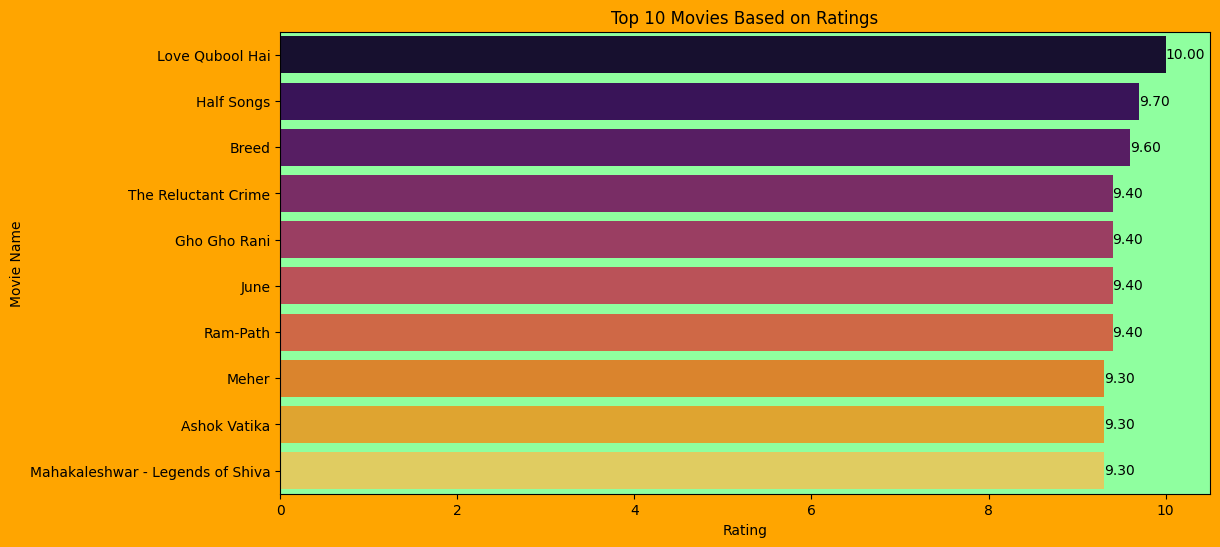

In [40]:
plt.figure(facecolor="orange", figsize=(12, 6))

ax = sns.barplot(y=top1_10["Name"], x=top1_10["Rating"], palette='inferno')
ax.set(xlabel='Rating', ylabel='Movie Name', title='Top 10 Movies Based on Ratings')
ax.set_facecolor("xkcd:mint green")

for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', 
                (p.get_width(), p.get_y() + p.get_height()/2), 
                ha='left', va='center', fontsize=10, color='black')

plt.show()

**Top 10 Movies Based On Votes**

In [41]:
top_10=df[["Name","Genre","Votes"]].sort_values(by="Votes",ascending=False).head(10)
print("TOP_10 based on votes")
top_10

TOP_10 based on votes


,Name,Genre,Votes
8219,Life of Pi,"Adventure, Drama, Fantasy",591417
75,3 Idiots,"Comedy, Drama",357889
8233,Lion,"Biography, Drama",220526
4848,Gandhi,"Biography, Drama, History",220118
14038,The Darjeeling Limited,"Adventure, Comedy, Drama",185127
8228,Like Stars on Earth,"Drama, Family",175810
10882,PK,"Comedy, Drama, Musical",168150
3410,Dangal,"Action, Biography, Drama",165074
11463,Radhe,"Action, Crime, Thriller",162455
3829,Dil Bechara,"Comedy, Drama, Romance",117377


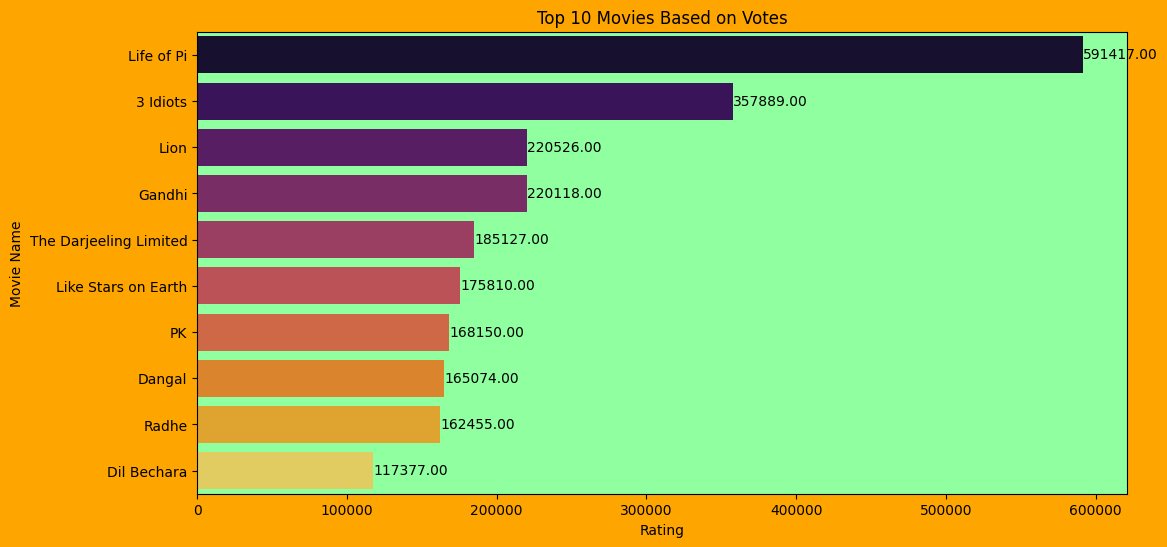

In [42]:
plt.figure(facecolor="orange", figsize=(12, 6))

ax = sns.barplot(y=top_10["Name"], x=top_10["Votes"], palette='inferno')
ax.set(xlabel='Rating', ylabel='Movie Name', title='Top 10 Movies Based on Votes')
ax.set_facecolor("xkcd:mint green")

for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', 
                (p.get_width(), p.get_y() + p.get_height()/2), 
                ha='left', va='center', fontsize=10, color='black')

plt.show()

**4. Dropping Statistically Insignificant Columns**

In [43]:
df.drop(columns=['Name','Duration'],axis=1,inplace=True)
df.head()

,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,2019,Drama,5.841621,8,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,2019,Drama,7.000000,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,2021,"Drama, Musical",5.841621,8,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,2019,"Comedy, Romance",4.400000,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,2010,Drama,5.841621,8,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


**5. Encoding Categorical features using Target encoding-Mean encoding**

In [44]:
# performing mean encoding
df['Genre encoded'] = round(df.groupby('Genre')['Rating'].transform('mean'),1)
df['Votes encoded'] = round(df.groupby('Votes')['Rating'].transform('mean'),1)
df['Director encoded'] = round(df.groupby('Director')['Rating'].transform('mean'),1)
df['Actor 1 encoded'] = round(df.groupby('Actor 1')['Rating'].transform('mean'),1)
df['Actor 2 encoded'] = round(df.groupby('Actor 2')['Rating'].transform('mean'),1)
df['Actor 3 encoded'] = round(df.groupby('Actor 3')['Rating'].transform('mean'),1)

df.drop(columns=['Genre','Votes','Director','Actor 1','Actor 2','Actor 3'],inplace=True)
df['Rating'] = round(df['Rating'],1)
df.head()

,Year,Rating,Genre encoded,Votes encoded,Director encoded,Actor 1 encoded,Actor 2 encoded,Actor 3 encoded
0,2019,5.8,6.0,5.8,5.8,5.8,5.5,5.8
1,2019,7.0,6.0,5.8,7.0,6.8,7.0,7.0
2,2021,5.8,6.3,5.8,5.8,6.2,6.8,5.8
3,2019,4.4,5.7,5.9,4.4,5.4,4.4,4.4
4,2010,5.8,6.0,5.8,6.3,6.8,5.8,5.5


**6. Separate X and Y Features**

In [45]:
X = df.drop(columns='Rating')
Y =df[['Rating']]

In [46]:
X.head()

,Year,Genre encoded,Votes encoded,Director encoded,Actor 1 encoded,Actor 2 encoded,Actor 3 encoded
0,2019,6.0,5.8,5.8,5.8,5.5,5.8
1,2019,6.0,5.8,7.0,6.8,7.0,7.0
2,2021,6.3,5.8,5.8,6.2,6.8,5.8
3,2019,5.7,5.9,4.4,5.4,4.4,4.4
4,2010,6.0,5.8,6.3,6.8,5.8,5.5


In [47]:
Y.head()

,Rating
0,5.8
1,7.0
2,5.8
3,4.4
4,5.8


**7. Split the dataset into Training Data and Testing Data**

In [48]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.25,random_state=21)

In [49]:
xtrain.shape

(11627, 7)

In [50]:
xtest.shape

(3876, 7)

In [51]:
ytrain.shape

(11627, 1)

In [52]:
ytest.shape

(3876, 1)

**8. Build The Model**

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [54]:
dict = {
    'Linear':LinearRegression(),
    'DecisionTree':DecisionTreeRegressor(),
    'RandomForest':RandomForestRegressor(),
    'GradientBoosting':GradientBoostingRegressor(),
    'KNN':KNeighborsRegressor(),
    'SVR':SVR()
}

In [55]:
dict.items()

dict_items([('Linear', LinearRegression()), ('DecisionTree', DecisionTreeRegressor()), ('RandomForest', RandomForestRegressor()), ('GradientBoosting', GradientBoostingRegressor()), ('KNN', KNeighborsRegressor()), ('SVR', SVR())])

In [56]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

In [57]:
train_mse = []
train_r2 = []
test_mse = []
test_r2 = []
train_cv = []

for name,model in dict.items():
    # fit the model
    m = model.fit(xtrain,ytrain)
    ypred_train = m.predict(xtrain)
    ypred_test = m.predict(xtest)
    # calculate MSE
    mse_train = mean_squared_error(ytrain,ypred_train)
    mse_test = mean_squared_error(ytest,ypred_test)
    # caluclate R2
    r2_train = (r2_score(ytrain,ypred_train))*100
    r2_test = (r2_score(ytest,ypred_test))*100
    # calculate cross validated scores
    cv = cross_val_score(m,xtrain,ytrain,cv=5,scoring='r2')
    scores = (cv.mean())*100

    # add these values to the respective list to compare the output
    train_mse.append(mse_train)
    train_r2.append(r2_train)
    test_mse.append(mse_test)
    test_r2.append(r2_test)
    train_cv.append(scores)

    # print the results
    print(f'Scores for {name}')
    print("Training Scores")
    print(f'MSE:{train_mse}')
    print(f'R2:{train_r2}')
    print("Testing Scores")
    print(f'MSE:{test_mse}')
    print(f'R2:{test_r2}')
    print(f'CV:{train_cv}')
    print("===============================")

Scores for Linear
Training Scores
MSE:[0.24292205405189032]
R2:[74.57212477515299]
Testing Scores
MSE:[0.2571004498548369]
R2:[75.18600338447983]
CV:[74.5059875860101]
Scores for DecisionTree
Training Scores
MSE:[0.24292205405189032, 0.00020885295719732806]
R2:[74.57212477515299, 99.97813830878106]
Testing Scores
MSE:[0.2571004498548369, 0.4134059310858847]
R2:[75.18600338447983, 60.100212268811326]
CV:[74.5059875860101, 57.20025634573489]
Scores for RandomForest
Training Scores
MSE:[0.24292205405189032, 0.00020885295719732806, 0.027027312478255305]
R2:[74.57212477515299, 99.97813830878106, 97.17091504086646]
Testing Scores
MSE:[0.2571004498548369, 0.4134059310858847, 0.20902309066852834]
R2:[75.18600338447983, 60.100212268811326, 79.82617973891945]
CV:[74.5059875860101, 57.20025634573489, 79.49897431149179]
Scores for GradientBoosting
Training Scores
MSE:[0.24292205405189032, 0.00020885295719732806, 0.027027312478255305, 0.186113057641966]
R2:[74.57212477515299, 99.97813830878106, 97.

In [58]:
res = {'Name':list(dict.keys()),
       'MSE Training Scores':train_mse,
       'MSE Testing Scores':test_mse,
       'R2 Training Scores':train_r2,
       'R2 Testing Scores':test_r2,
       'CV Training Scores':train_cv}

In [ ]:
df_res = pd.DataFrame(res)
df_res.sort_values('CV Training Scores',ascending=False)

,Name,MSE Training Scores,MSE Testing Scores,R2 Training Scores,R2 Testing Scores,CV Training Scores
2,RandomForest,0.027027,0.209023,97.170915,79.826180,79.498974
3,GradientBoosting,0.186113,0.220431,80.518609,78.725165,78.268506
0,Linear,0.242922,0.257100,74.572125,75.186003,74.505988
4,KNN,0.179292,0.285027,81.232582,72.490635,70.760266
1,DecisionTree,0.000209,0.413406,99.978138,60.100212,57.200256
5,SVR,0.952299,1.035303,0.318020,0.077982,0.115717


Lets consider Random Forest Regressor as it is giving good results.

**9. Fine Tuning RandomForestRegressor**

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
params = {'n_estimators':[100,200],
          'max_depth':[5,6],
          'min_samples_split':[2,3],
          'criterion':['squared_error','absolute_error']}

In [62]:
rfr = RandomForestRegressor()

In [63]:
rscv = RandomizedSearchCV(rfr,params,cv=3,scoring='neg_mean_squared_error')

In [ ]:
rscv.fit(xtrain,ytrain)

In [67]:
rscv.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'max_depth': 6,
 'criterion': 'squared_error'}

In [68]:
best_rfr = rscv.best_estimator_
best_rfr

RandomForestRegressor(max_depth=6, n_estimators=200)

In [69]:
best_rfr.score(xtrain,ytrain)

0.7767532553591154

In [70]:
best_rfr.score(xtest,ytest)

0.756671275789774

Random Forest model gives score results around 76%.

**10. Model Prediction**

In [71]:
ypred_test = best_rfr.predict(xtest)
ypred_test[:10]

array([5.88116516, 8.01942221, 4.94958347, 2.51585482, 5.79415593,
       5.79415593, 5.79415593, 5.47324411, 5.79415593, 5.81901527])

In [72]:
ytest.head(10)

,Rating
3077,5.8
10882,8.1
5424,5.6
4170,1.9
5928,5.8
579,5.8
2406,5.8
12686,6.8
2026,5.8
6573,6.0


In [73]:
df_final = xtest
df_final['Predicted_Rating'] = ypred_test
df_final

,Year,Genre encoded,Votes encoded,Director encoded,Actor 1 encoded,Actor 2 encoded,Actor 3 encoded,Predicted_Rating
3077,1954,6.0,5.8,6.0,5.8,6.6,5.8,5.881165
10882,2014,6.2,8.1,8.1,6.9,6.4,5.1,8.019422
5424,2000,5.3,5.6,5.0,5.6,5.8,5.1,4.949583
4170,2013,5.4,5.4,3.9,1.9,3.5,1.9,2.515855
5928,2004,5.6,5.8,5.8,5.8,5.8,5.9,5.794156
...,...,...,...,...,...,...,...,...
6870,1988,5.6,5.4,5.0,4.7,5.1,3.3,3.549974
13353,1964,5.6,5.7,5.5,5.5,5.6,4.8,5.253604
2870,1980,6.0,6.1,8.1,5.6,6.5,5.7,7.765434
9524,1995,5.8,5.8,5.8,5.8,5.8,5.8,5.794156
